# 5. Classifying Wine Quality Using Decision Trees

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
data = pd.read_csv('./datasets/wine_quality.csv')

Standardize features

In [3]:
scaler = StandardScaler()
X = data.drop(columns=['quality'])
X_scaled = scaler.fit_transform(X)

Encode target variable: 'quality'

In [4]:
# Assuming quality >= 7 is 'good' (1) and < 7 is 'bad' (0)
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

Split the dataset into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the decision tree classifier

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make Predictions

In [7]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

Evaluate the model

In [8]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.903125
ROC-AUC: 0.8163462345730836
Confusion Matrix:
[[259  18]
 [ 13  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       277
           1       0.62      0.70      0.66        43

    accuracy                           0.90       320
   macro avg       0.79      0.82      0.80       320
weighted avg       0.91      0.90      0.91       320



Plot ROC curve

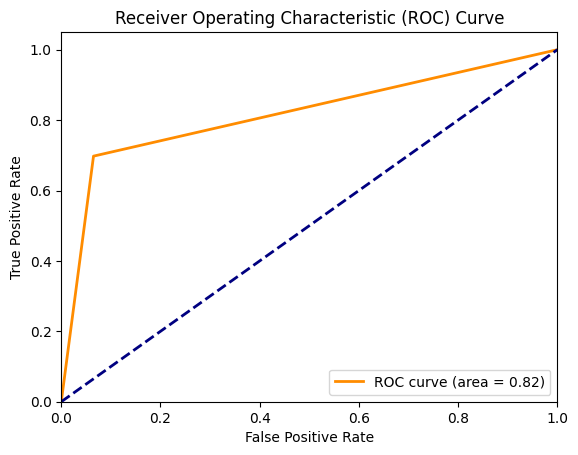

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()